In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [70]:
(X_train , y_train),(X_test,y_test) = mnist.load_data()

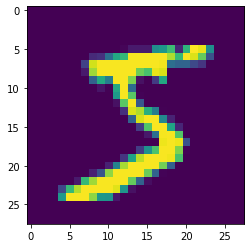

In [71]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [75]:
X_test = X_test.reshape(len(X_test),28,28,1)
X_train = X_train.reshape(len(X_train),28,28,1)

In [76]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [78]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [79]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten, Dense

## Model Creation

In [ ]:
model = Sequential()

## Adding layers to model
### First Layer

In [ ]:

model.add(Conv2D(64, kernel_size=3,activation='relu', input_shape=(28,28,1)))



### Seceond Layer

In [ ]:

model.add(Conv2D(32,kernel_size=3,activation='relu'))


### Flatten Layer

In [ ]:

model.add(Flatten())




### Output Layer



model.add(Dense(10,activation='softmax'))


## Compiling Model to make our Convolutional Network work ready


In [83]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training the create model

In [86]:
model.fit(X_train,y_train, epochs=3,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 522s 9ms/step - loss: 0.1360 - accuracy: 0.9609 - val_loss: 0.0860 - val_accuracy: 0.9744
Epoch 2/3
60000/60000 [==============================] - 455s 8ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0748 - val_accuracy: 0.9788
Epoch 3/3
60000/60000 [==============================] - 438s 7ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0796 - val_accuracy: 0.9775


## Predicted value

In [91]:
x = model.predict(X_test[:4])
x

array([[5.53863932e-09, 1.83441370e-12, 4.86985409e-05, 1.18591481e-06,
        7.72279444e-14, 2.20268886e-10, 1.09358935e-16, 9.99950051e-01,
        2.41482057e-09, 2.84859194e-08],
       [1.54236997e-08, 3.17312271e-07, 9.99999404e-01, 1.53070872e-08,
        1.45789779e-13, 1.62057017e-11, 2.40225802e-07, 1.89477925e-15,
        8.43803638e-10, 2.45092160e-16],
       [5.28457598e-08, 9.99955773e-01, 1.94452750e-05, 1.02100319e-08,
        2.87803664e-06, 1.82753251e-06, 1.07286986e-07, 2.37120208e-08,
        1.96298479e-05, 3.79695649e-07],
       [9.99925733e-01, 1.38657922e-11, 3.91285685e-05, 3.57820440e-10,
        2.68438805e-09, 7.90887356e-08, 3.48691756e-05, 6.80540901e-10,
        5.92459992e-09, 1.28466539e-07]], dtype=float32)

## Actual Value

In [89]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Ploting the predicted value


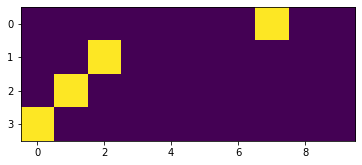

In [90]:
plt.imshow(x)

In [92]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("CNN_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
